In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load data
from sklearn.datasets import load_iris

data = load_iris() # 数据特征
iris_labels = data.target # 数据标签
iris_names = data.target_names #iris分类对应的名字
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names)


In [11]:
# 查看数据基本信息

iris_features.info()

print(iris_features.head())

print(iris_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa' 'versicolor' 'virginica']


In [27]:
pd.Series(iris_labels).value_counts()

2    50
1    50
0    50
dtype: int64

In [16]:
# 准备数据
iris_all = iris_features.copy()
iris_all['label'] = iris_labels

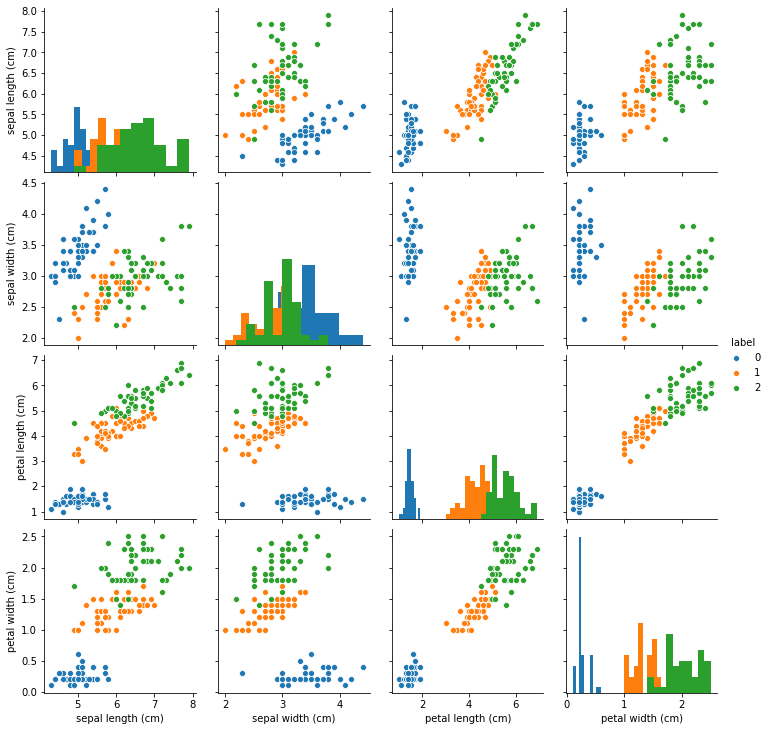

In [65]:
# 查看数据分布
sns.pairplot(data=iris_all, diag_kind='hist', hue='label')

plt.savefig('iris1.png')
plt.show()

# 从图中可以看出来，petal width和petal length的区分能力比较好

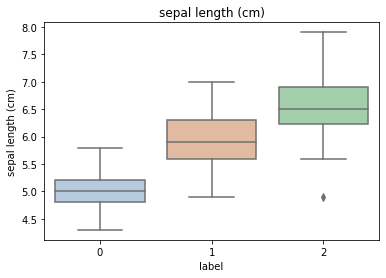

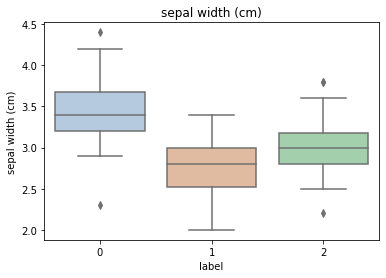

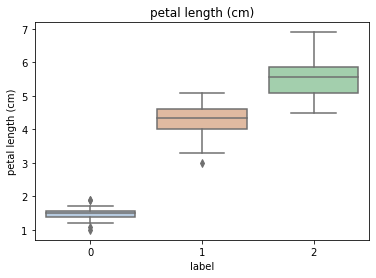

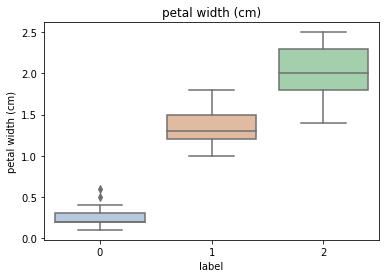

In [66]:
# 从箱线图查看各个特征数据分布

for col in iris_features.columns:
    sns.boxplot(x='label', y = col, saturation=0.5, palette = 'pastel', data=iris_all)
    plt.title(col)
    plt.savefig(col + '.png')
    plt.show()

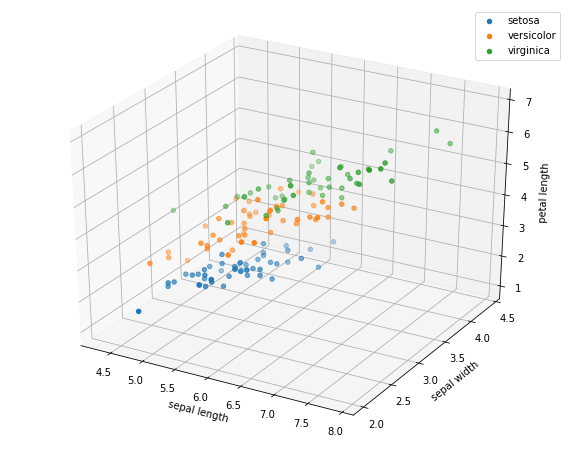

In [67]:
# 选取前三个特征绘制三维散点图

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

iris_all_class0 = iris_all[iris_all['label']==0].values
iris_all_class1 = iris_all[iris_all['label']==1].values
iris_all_class2 = iris_all[iris_all['label']==2].values

ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2], label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2], label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2], label='virginica')

ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')

plt.legend()
plt.savefig('iris2.png')
plt.show()

In [70]:
# 分割数据集和训练集
from sklearn.model_selection import train_test_split

# 先选取类别为0和1的数据，进行二分类训练
iris_features_part = iris_all[iris_all['label']<2]
iris_labels_part = iris_features_part.pop('label').tolist()

print(iris_features_part)
print(iris_labels_part)

x_train, x_test, y_train, y_test = train_test_split(iris_features_part, iris_labels_part, test_size=0.3, random_state=2020)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
..                ...               ...                ...               ...
95                5.7               3.0                4.2               1.2
96                5.7               2.9                4.2               1.3
97                6.2               2.9                4.3               1.3
98                5.1               2.5                3.0               1.1
99                5.7               2.8                4.1               1.3

[100 rows x 4 columns]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [71]:
# 用逻辑回归模型来训练
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [72]:
## 查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)

## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)

the weight of Logistic Regression: [[ 0.52182512 -0.73962102  2.05459282  0.86388007]]
the intercept(w0) of Logistic Regression: [-6.9213995]


In [73]:
# 在测试集和训练集上预测
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

In [74]:
# 预测结果检验
from sklearn import metrics

print('The accuracy in train data: ', metrics.accuracy_score(y_train, train_pred))
print('The accuracy in test data: ', metrics.accuracy_score(y_test, test_pred))

The accuracy in train data:  1.0
The accuracy in test data:  1.0


confusion matrix result:  [[15  0]
 [ 0 15]]


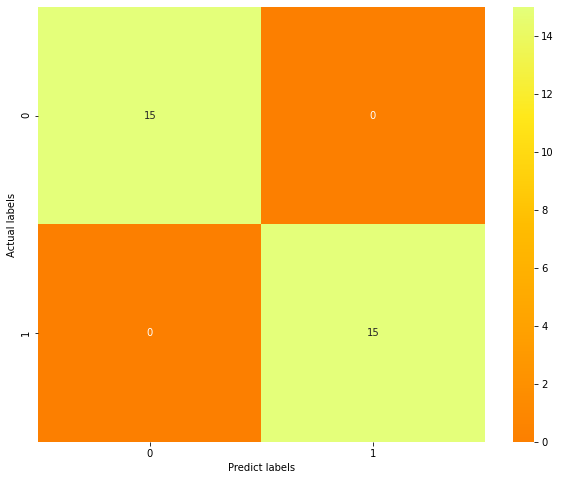

In [75]:
# 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_pred, y_test)
print('confusion matrix result: ', confusion_matrix_result)

#热力图可视化
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Wistia_r')

plt.xlabel('Predict labels')
plt.ylabel('Actual labels')
plt.savefig('iris3.png')
plt.show()

结果显示， 在当前的二分类任务中，分类器都预测正确了

In [58]:
# 利用逻辑回归，在多分类任务上进行训练和预测

# 分割测试集和训练集（20%/80%）
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_labels, test_size=0.2, random_state=2020)

clf = LogisticRegression(random_state=0, solver='lbfgs')

clf.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [63]:
# 查看coef
coef_data = pd.DataFrame({'features': iris_features.columns.tolist()})
coef_data[iris_names[0]] = clf.coef_[0].T
coef_data[iris_names[1]] = clf.coef_[1].T
coef_data[iris_names[2]] = clf.coef_[2].T

print(coef_data)

            features    setosa  versicolor  virginica
0  sepal length (cm) -0.459289    0.331173   0.128116
1   sepal width (cm)  0.830699   -0.728634  -0.102065
2  petal length (cm) -2.266065   -0.068411   2.334477
3   petal width (cm) -0.997440   -0.987110   1.984550


The accuracy in train data:  0.9833333333333333
The accuracy in test data:  0.8666666666666667
confusion matrix result:  [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


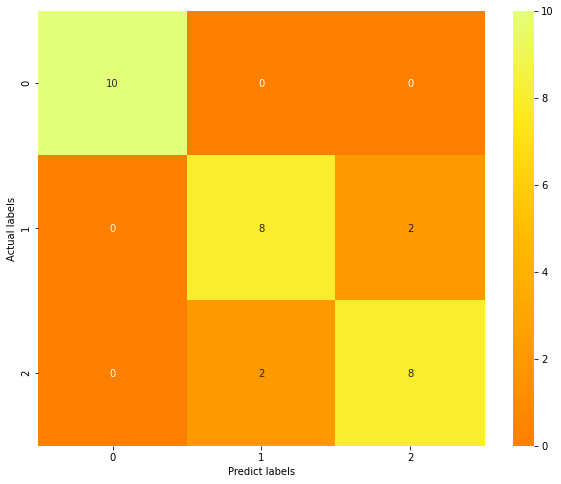

In [69]:
# 在训练集和测试集上预测

train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

print('The accuracy in train data: ', metrics.accuracy_score(y_train, train_pred))
print('The accuracy in test data: ', metrics.accuracy_score(y_test, test_pred))

confusion_matrix_result = metrics.confusion_matrix(test_pred, y_test)
print('confusion matrix result: ', confusion_matrix_result)

#热力图可视化
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Wistia_r')

plt.xlabel('Predict labels')
plt.ylabel('Actual labels')
plt.savefig('iris4.png')
plt.show()